<a href="https://colab.research.google.com/github/sharonwanjiru/NLPProject/blob/main/Latestcopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.filterwarnings('ignore')
import nltk
#nltk.download('all')
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import spacy

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
exclude_list = ['but','no','because','against','not','than']
stop_words = set(stopwords.words('english'))
stop_words.difference_update(exclude_list)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
#import csv
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
data1 =  "/content/gdrive/MyDrive/PainMedicationRecommendation/drugsComTrain_raw.csv"
data2 = "/content/gdrive/MyDrive/PainMedicationRecommendation/drugsComTest_raw.csv"

In [79]:
df_train = pd.read_csv((data1))
df_test = pd.read_csv((data2))

In [80]:
print("The shape of training:",df_train.shape)
print("The shape of training:",df_test.shape)


The shape of training: (161297, 7)
The shape of training: (53766, 7)


In [81]:
df_data = pd.concat([df_train,df_test])
print (df_data.shape)
df_data.head()

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [82]:
df_data.columns = df_data.columns.str.lower()

In [83]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount'],
      dtype='object')

**Data Analysis**

In [84]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueid     215063 non-null  int64 
 1   drugname     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulcount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [85]:
cat = []
num = []
for i in df_data.columns:
  if df_data[i].dtypes=='object':
    cat.append(i)
  else:
    num.append(i)
print('number of numeric variables are',len(num))
print('number of categorical cvariables are', len(cat))


number of numeric variables are 3
number of categorical cvariables are 4


In [86]:
df_data.describe()

,uniqueid,rating,usefulcount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


NULL VALUES

In [87]:
df_data.isnull().sum()

uniqueid          0
drugname          0
condition      1194
review            0
rating            0
date              0
usefulcount       0
dtype: int64

In [88]:
print("Missing value (%):", 1200/df_data.shape[0] *100)

Missing value (%): 0.5579760349292998


In [89]:
from pandas.core import missing
percent_missing = df_data.isnull().sum()*100/ len(df_data)
missing_value_df = pd.DataFrame({'column_name': df_data.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
uniqueid,uniqueid,0.000000
drugname,drugname,0.000000
condition,condition,0.555186
review,review,0.000000
rating,rating,0.000000
date,date,0.000000
usefulcount,usefulcount,0.000000


*condition with null data is less than 0.6 so I drop ythe null value*

In [90]:

print('Shape of df before dropping null values',df_data.shape)
df_data.dropna(inplace=True)
df_data.reset_index(drop=True)
print('Shape of df before dropping null values',df_data.shape)

Shape of df before dropping null values (215063, 7)
Shape of df before dropping null values (213869, 7)


Concerting date columns to required datatyppe

In [91]:
#since its not in date time format
df_data['date']=pd.to_datetime(df_data['date'])


**Interential Statistics**

In [92]:
df_data.nunique()

uniqueid       213869
drugname         3667
condition         916
review         128449
rating             10
date             3579
usefulcount       397
dtype: int64

In [93]:
#some conditions
df_data['condition'].value_counts().head(10)

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

Text(0, 0.5, 'Count')

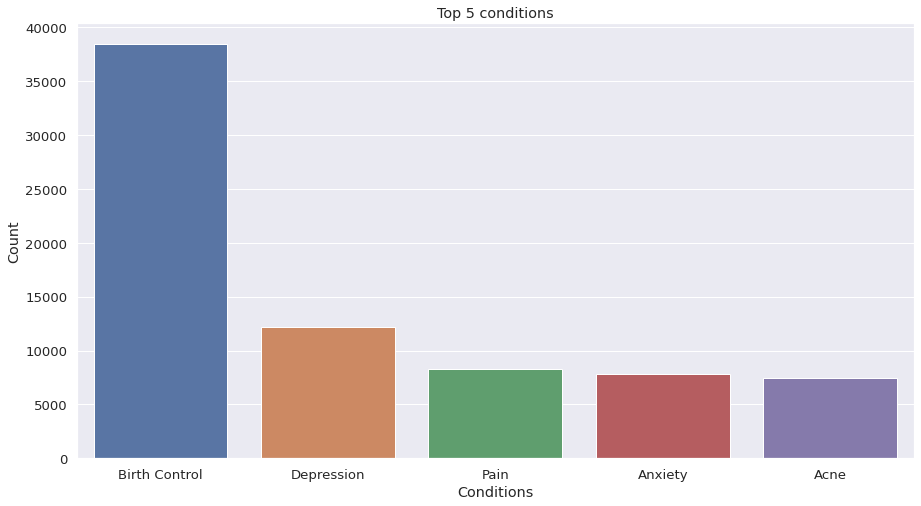

In [94]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]

con = dict(df_data.condition.value_counts()[:5])
fig = sns.barplot(list(con.keys()),list(con.values()))
fig.set_title("Top 5 conditions")
fig.set_xlabel("Conditions")
fig.set_ylabel("Count")

In [95]:
# Top 10 drugs which got a rating of 10
df_data.loc[df_data['rating']==10]['drugname'].value_counts().head(10)

Levonorgestrel                       1883
Phentermine                          1079
Etonogestrel                          864
Varenicline                           662
Ethinyl estradiol / norethindrone     601
Escitalopram                          596
Clonazepam                            586
Alprazolam                            565
Sertraline                            550
Plan B                                527
Name: drugname, dtype: int64

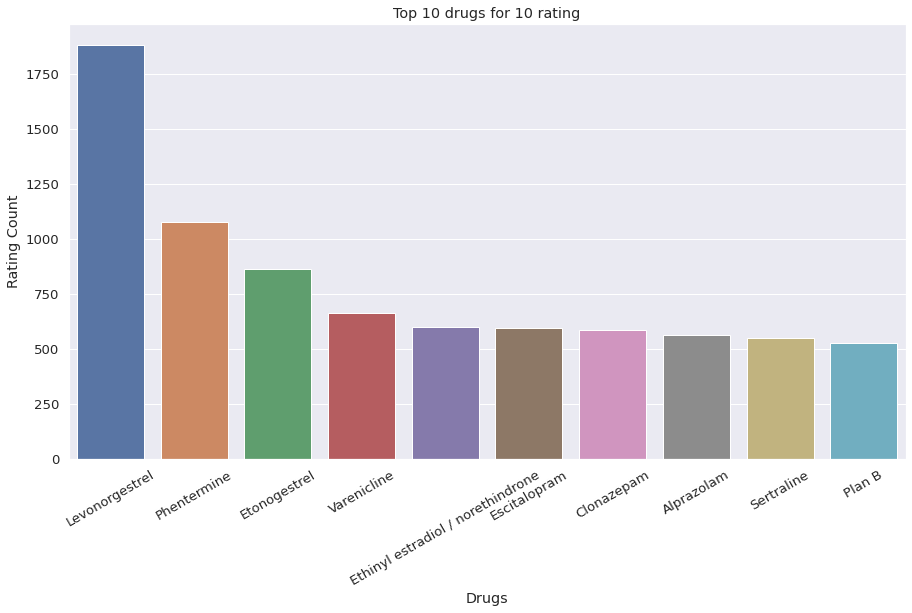

In [96]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]


drugs= dict(df_data.loc[df_data['rating']==10]['drugname'].value_counts().head(10))
fig = sns.barplot(list(drugs.keys()),list(drugs.values()))
fig.set_title("Top 10 drugs for 10 rating")
fig.set_xlabel("Drugs")
fig.set_ylabel("Rating Count")
fig.set_xticklabels(list(drugs.keys()),rotation=30);

In [97]:
# Top 10 drugs which got a rating of 10
df_data.loc[df_data['rating']==1]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

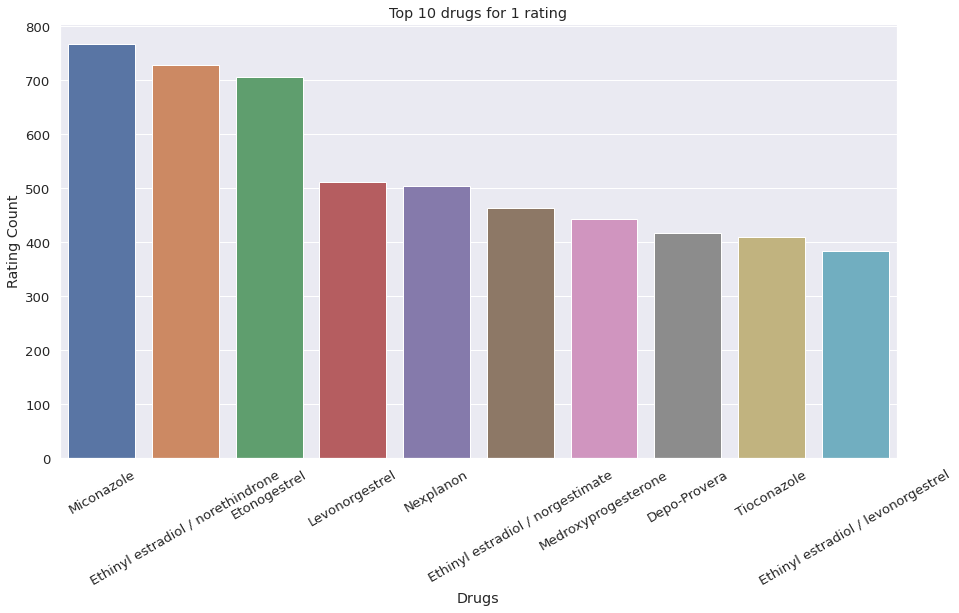

In [98]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]


drugs= dict(df_data.loc[df_data['rating']==1]['drugname'].value_counts().head(10))
fig = sns.barplot(list(drugs.keys()),list(drugs.values()))
fig.set_title("Top 10 drugs for 1 rating")
fig.set_xlabel("Drugs")
fig.set_ylabel("Rating Count")
fig.set_xticklabels(list(drugs.keys()),rotation=30);

AttributeError: ignored

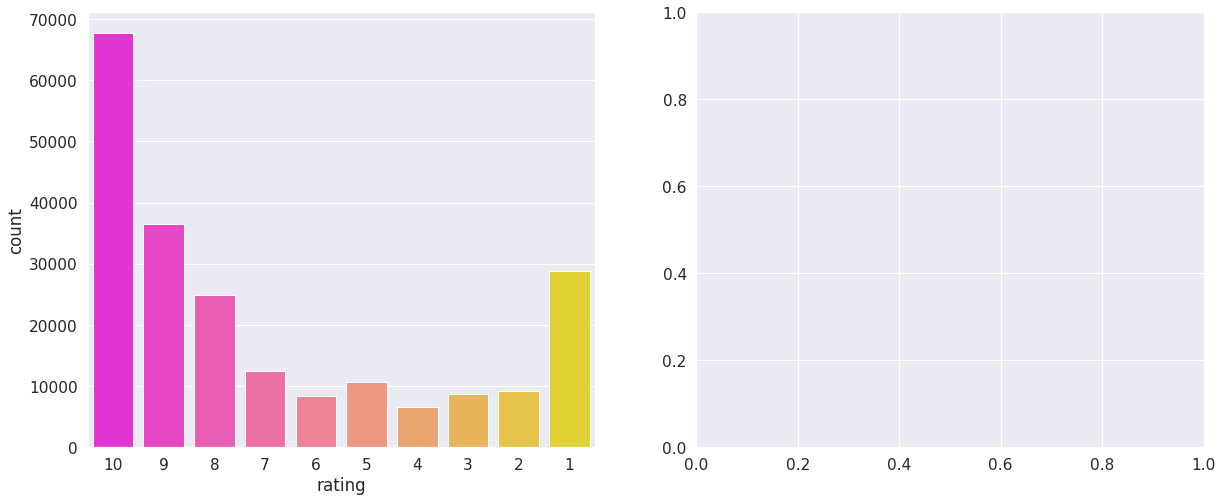

In [99]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)
#fig = sns.histplot(data=df_data, x="rating", kde=True)
sns_1 = sns.countplot(df_data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_2 = sns.distplot(df_data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")
plt.show()

In [100]:
sns.set(font_scale=1.2, style ='darkgrid')
plt.rcParams['figure.figsize']=[15,8]
#penguins = sns.load_dataset("penguins")
#sns.histplot(data=penguins, x="flipper_length_mm")
#fig = sns.histplot(df_data['rating'], x="rating", kde=True)
fig.set_title("ratingd count")
fig.set_xlabel("Rating")
fig.set_ylabel("Count for each rating");


AttributeError: ignored

In [101]:
df_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending= False).head(15).plot.bar(figsize = (15,8)),color='blue'

SyntaxError: ignored

Correlation Plot

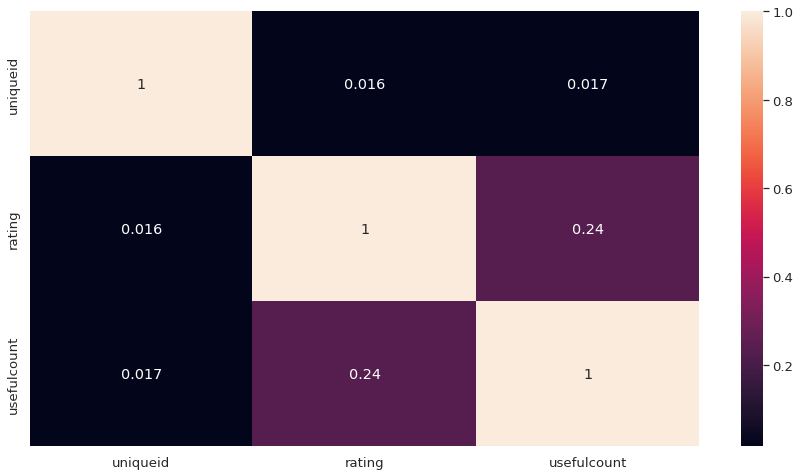

In [102]:
sns.heatmap(df_data.corr(),annot=True)

In [103]:
df_data.reset_index(drop=True,inplace=True)

(-0.5, 799.5, 499.5, -0.5)

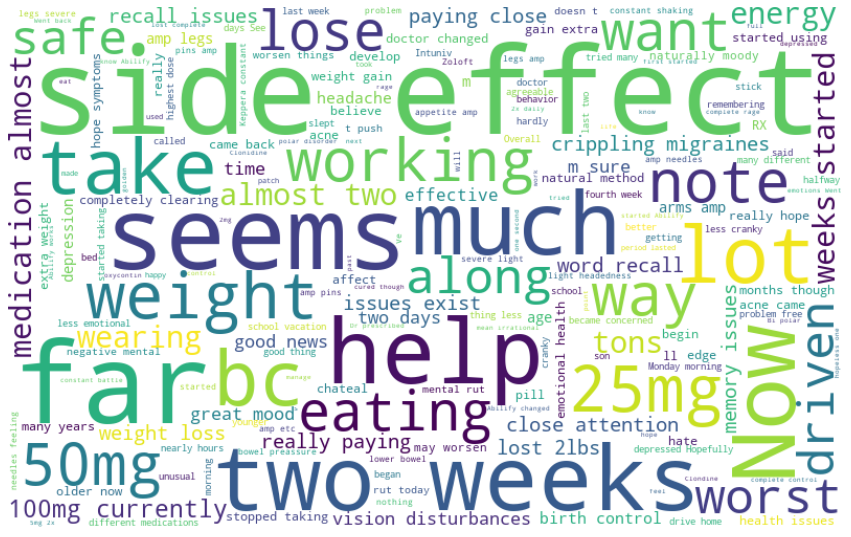

In [111]:
#word cloud for drugs with rating of 10
df_rate_ten = df_data.loc[df_data.rating, 'review']
K= (' '.join(df_rate_ten))

wordcloud = WordCloud(width=800, height=500,background_color='white').generate(K)
#wordcloud = WordCloud(width = 800, height= 500, background_color='white')..generate(k)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

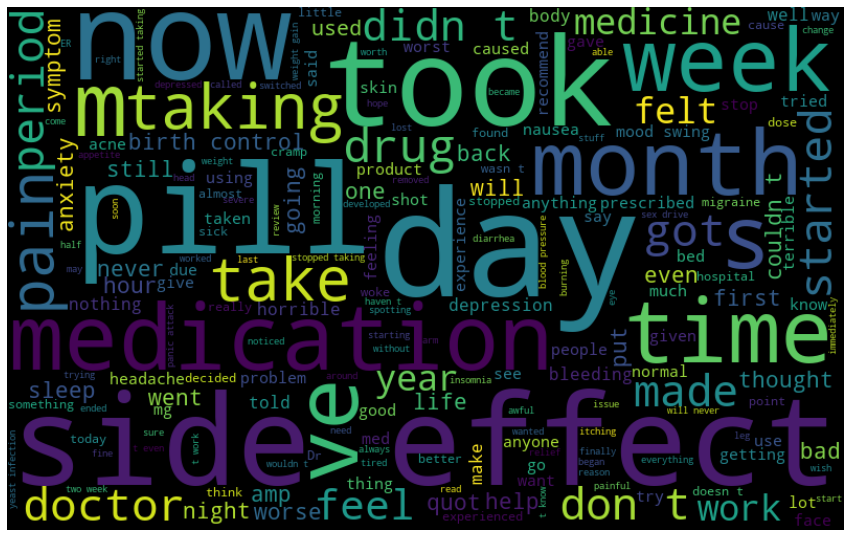

In [107]:
#word cloud for drugs with rating of 1
df_rate_one = df_data.loc[df_data.rating==1, 'review']
K1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width=800, height=500).generate(K1)
#wordcloud = WordCloud(width = 800, height= 500, background_color='white'.generate(k))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

Text PreProcessing

In [113]:
#from nltk.corpus.reader.wordnet import Lemma
#single function for preprocessing using spacy
#...
def normalize(comment, lowercase, remove_stopwords):
  if lowercase:
    comment = comment.lower()
  comment = nlp(comment)
  lemmatized = list()
  for word in comment:
    lemma = word.lemma_strip()
    if lemma:
      if not remove_stopwords or (remove_stopwords and lemma not in stops):
        lemmatized.append(lemma)
  return " ".join(lemmatized)

  df_data['review_clean']=df_data['review'].apply(normalize, lowercase=True, remove_stopwords=True)
#...

In [118]:
lst = df_data['review'].tolist()
matched_list = [ele for ele in lst if '&#039' in ele]
print('No of rows with character with &#039', len(matched_list))

No of rows with character with &#039 133540


converting the junk key words

In [119]:
df_data['review'] = df_data['review'].str.replace('&#039;',"'")

In [120]:
lst = df_data['review'].tolist()
matched_list = [ele for ele in lst if '&#039' in ele]
print(len(matched_list))
matched_list

0


[]

In [123]:
import re
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re= re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#function to expand the contractions if any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

# Expanding Contractions in the reviews
df_data['review_clean']=df_data['review'].apply(expand_contractions)

In [128]:
count = 0
def normalize_punc_lemmatize(text):
  global count
  count = count+1
  #normalising by lowering case
  text = text.lower()
  #remove punctuation
  text_p = "".join([char for char in text if char not in string.punctuation])
  #lemmatizing text
  doc = nlp(text_p)
  #sen="".join([token.lemma_ ])
  sen = " ".join([token.lemma_ if token.lemma_ != '-PRON-' else str(token) for token in doc])
  #print(count)

df_data['review_clean'] = df_data['review_clean'].apply(normalize_punc_lemmatize)


In [ ]:
df_data

Tokenisation

In [ ]:
def preprocess(text):

  words = word_tokenize(text)
  filtered_words = [word for word in words if word not in stop_words]
  final_string = "".join(filtered_words)
  return final_string
df_data['review_clean']=df_data['review_clean'].apply(preprocess)

Feature Engineering

In [ ]:
# sentiment polarity
def sentiment(review):
  pol=[]
  for i in review:
    analysis= TextBlob(i)
    pol.append(analysis.sentiment.polarity)
  return pol

  df_data['sentiment'] = sentiment(df_data['review']) 
  df_data['sentiment_processed'] = sentiment(df_data['review_clean'])

In [ ]:
np.corrcoef(df_data['sentiment'],df_data['rating'])

In [ ]:
np.corrcoef(df_data['sentiment_processed'],df_data['rating'])

No much diff between in correlation btwn rating-revie and rating-cleaned review- no important data lost

In [ ]:
df_data.head()

In [ ]:
df_data['review'].iloc(0)

In [ ]:
df_data['review_clean'].iloc[0]

In [ ]:
#word cound for each review
df_data['word_count']=df_data["review_clean"].apply(lambda x: len(str(x).split()))

#unique word count
df_data['unique_word_count']=df_data["review_clean"].apply(lambda x: len(str(x).split()))

#puntuation count
df_data['puntuation_count']=df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#uppercase words count
df_data['upper_word_count']=df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title_case count
df_data['title_word_count']=df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#No of stopwrods
df_data['stopword_count']=df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#mean length of the words

df_data['mean_word_len']=df_data["mean_word_len"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [ ]:
df_data.head()

In [ ]:
#encoding
label_encoder_drug=LabelEncoder()
label_encoder_condition =LabelEncoder()
df_data['drugname']=label_encoder_drug.fit_transform(df_data['drugname'])
df_data['condition']=label_encoder_condition.fit_transform(df_data['condition'])

In [ ]:
df_data.head()

Using all features to model

In [ ]:
X_train = df_data[df_data['uniqueid'].isin(df_train['uniqueID'])].filter()

In [ ]:
X_train.columns

In [ ]:
clf = LGBMClassifier(
    n_estimators=10000,
    learning_rate=1,
    num_leaves=200,
    subsample=.9,
    max_depth=7,
    reg_alpha=.1,
    reg_lambda=.1,
    min_split_gain=.01,
    min_child_weight=2,
    silent=1,
    verbose =-1,
    num_iterations=15

)
model = clf.fit(X_train,y_train)

#predictions
predictions_ml = model.predict(X_test)
print("The accuracy of the model is ", accuracy_score(y_test,predictions_ml), '\n')
print ("The confusion matrix is \n")